In [24]:
# Load data and modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error
from xgboost import XGBClassifier
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from datetime import timedelta

df_base = pd.read_csv('train2.csv') 

print(df_base.describe())
df_base.head()

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000


Dates        Category                      Descript   
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST  \
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address   
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST  \
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

[Text(0, 0, 'LARCENY/THEFT'),
 Text(1, 0, 'OTHER OFFENSES'),
 Text(2, 0, 'NON-CRIMINAL'),
 Text(3, 0, 'ASSAULT'),
 Text(4, 0, 'DRUG/NARCOTIC'),
 Text(5, 0, 'VEHICLE THEFT'),
 Text(6, 0, 'VANDALISM'),
 Text(7, 0, 'WARRANTS'),
 Text(8, 0, 'BURGLARY'),
 Text(9, 0, 'SUSPICIOUS OCC'),
 Text(10, 0, 'MISSING PERSON'),
 Text(11, 0, 'ROBBERY'),
 Text(12, 0, 'FRAUD'),
 Text(13, 0, 'FORGERY/COUNTERFEITING'),
 Text(14, 0, 'SECONDARY CODES'),
 Text(15, 0, 'WEAPON LAWS'),
 Text(16, 0, 'PROSTITUTION'),
 Text(17, 0, 'TRESPASS'),
 Text(18, 0, 'STOLEN PROPERTY'),
 Text(19, 0, 'SEX OFFENSES FORCIBLE'),
 Text(20, 0, 'DISORDERLY CONDUCT'),
 Text(21, 0, 'DRUNKENNESS'),
 Text(22, 0, 'RECOVERED VEHICLE'),
 Text(23, 0, 'KIDNAPPING'),
 Text(24, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(25, 0, 'RUNAWAY'),
 Text(26, 0, 'LIQUOR LAWS'),
 Text(27, 0, 'ARSON'),
 Text(28, 0, 'LOITERING'),
 Text(29, 0, 'EMBEZZLEMENT'),
 Text(30, 0, 'SUICIDE'),
 Text(31, 0, 'FAMILY OFFENSES'),
 Text(32, 0, 'BAD CHECKS'),
 Text(33, 0, 'BR

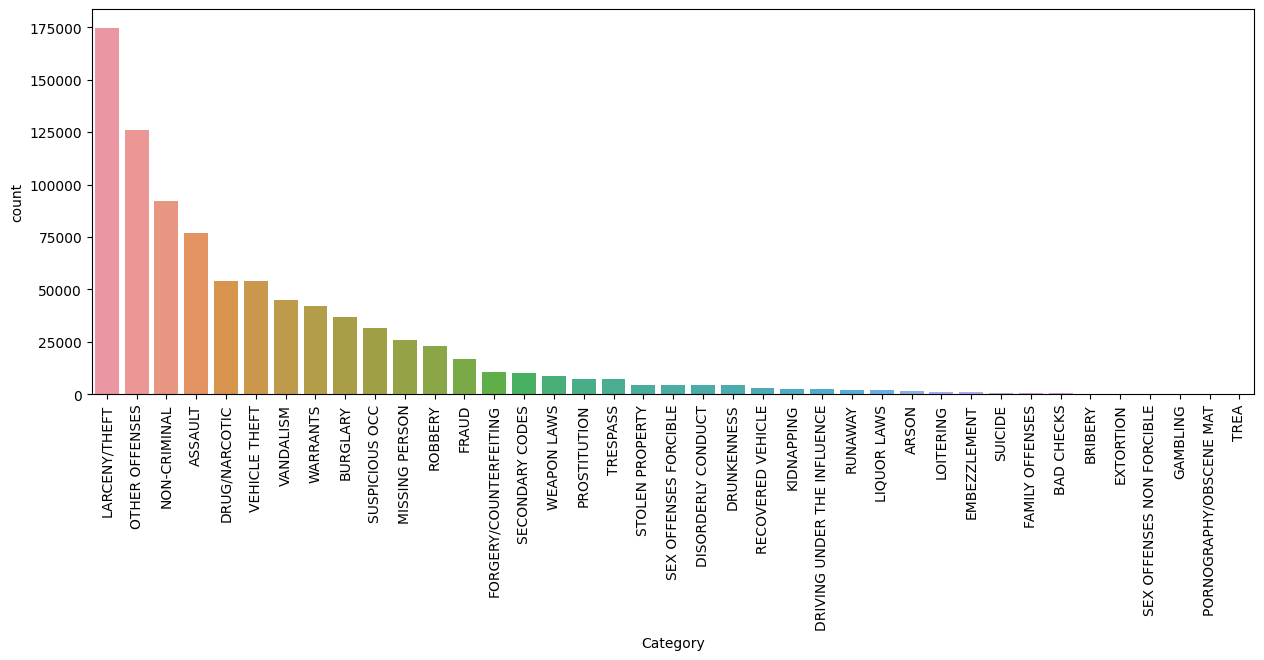

In [25]:
# Shows frequency of categories of crimes to help understand our data
plt.figure(figsize=(15,5))
ax = sns.countplot(x = df_base['Category'], orient='v', order = df_base['Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

C:\Users\Andre\AppData\Local\Temp\ipykernel_4560\135401592.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0.0, 0, '0'),
 Text(20000.0, 0, '20000'),
 Text(40000.0, 0, '40000'),
 Text(60000.0, 0, '60000'),
 Text(80000.0, 0, '80000'),
 Text(100000.0, 0, '100000'),
 Text(120000.0, 0, '120000'),
 Text(140000.0, 0, '140000'),
 Text(160000.0, 0, '160000')]

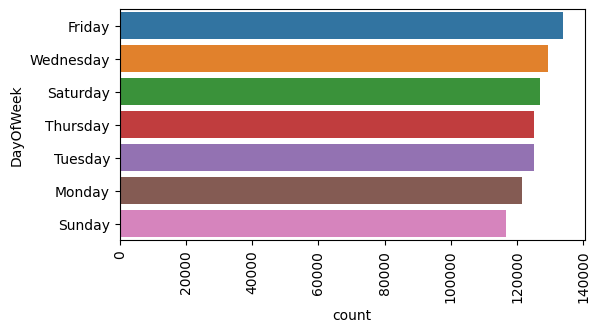

In [26]:
# Print crime counts per weekday to also help us understand our data
plt.figure(figsize=(6,3))
ax = sns.countplot(y = df_base['DayOfWeek'], orient='v', order = df_base['DayOfWeek'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<Figure size 1600x1000 with 0 Axes>

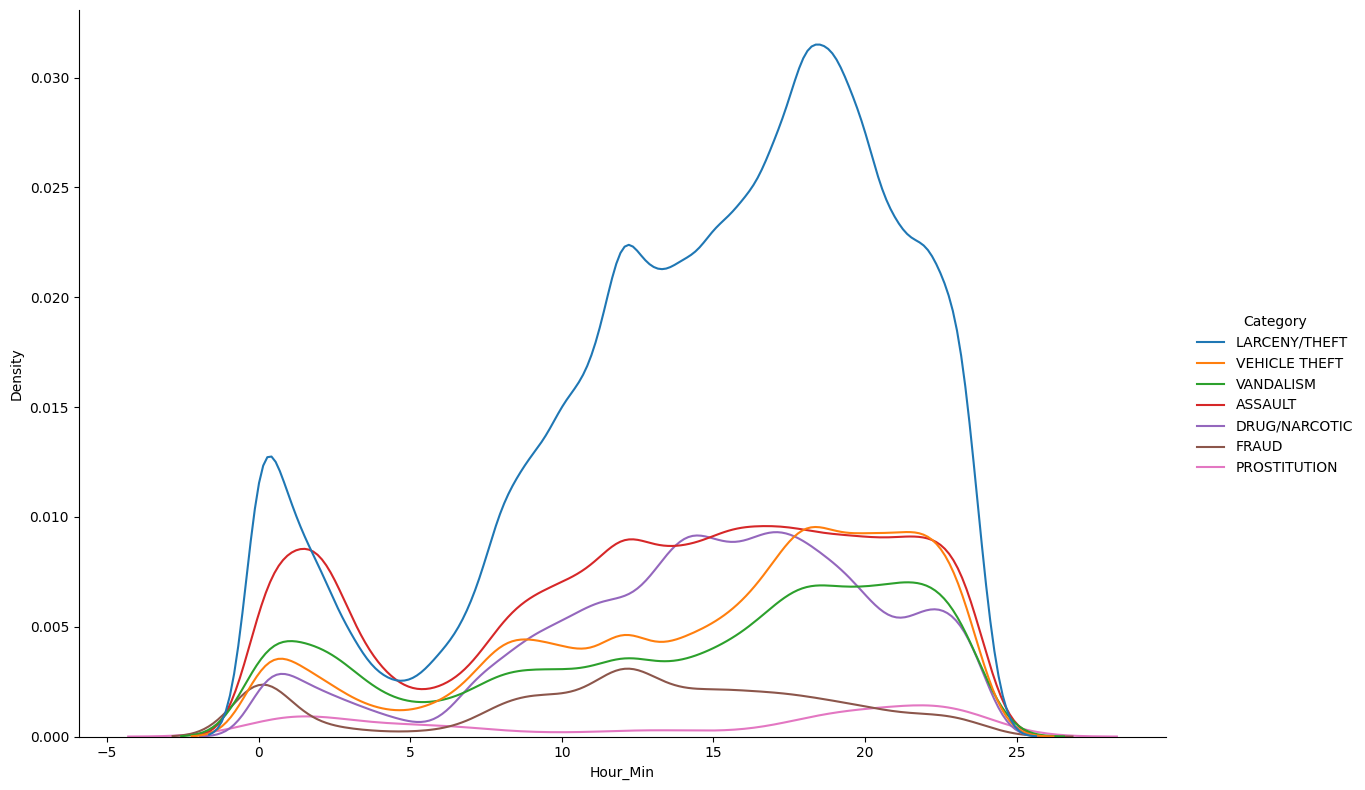

In [27]:
# Convert the time to minutes
df_base['Hour_Min'] = pd.to_datetime(df_base['Dates']).dt.hour  + pd.to_datetime(df_base['Dates']).dt.minute / 60
df_base['Hour'] = pd.to_datetime(df_base['Dates']).dt.hour

# Print crime counts per time and category to get overview of when the crimes were comitted
df_base_filtered = df_base[df_base['Category'].isin([
    'PROSTITUTION', 
    'VEHICLE THEFT', 
    'DRUG/NARCOTIC', 
    'WARRENTS', 
    'BURGLERY', 
    'FRAUD', 
    'ASSAULT',
    'LARCENY/THEFT',
    'VANDALISM'])]

plt.figure(figsize=(16,10))
ax = sns.displot(x = 'Hour_Min', hue="Category", data = df_base_filtered, kind="kde", height=8, aspect=1.5)

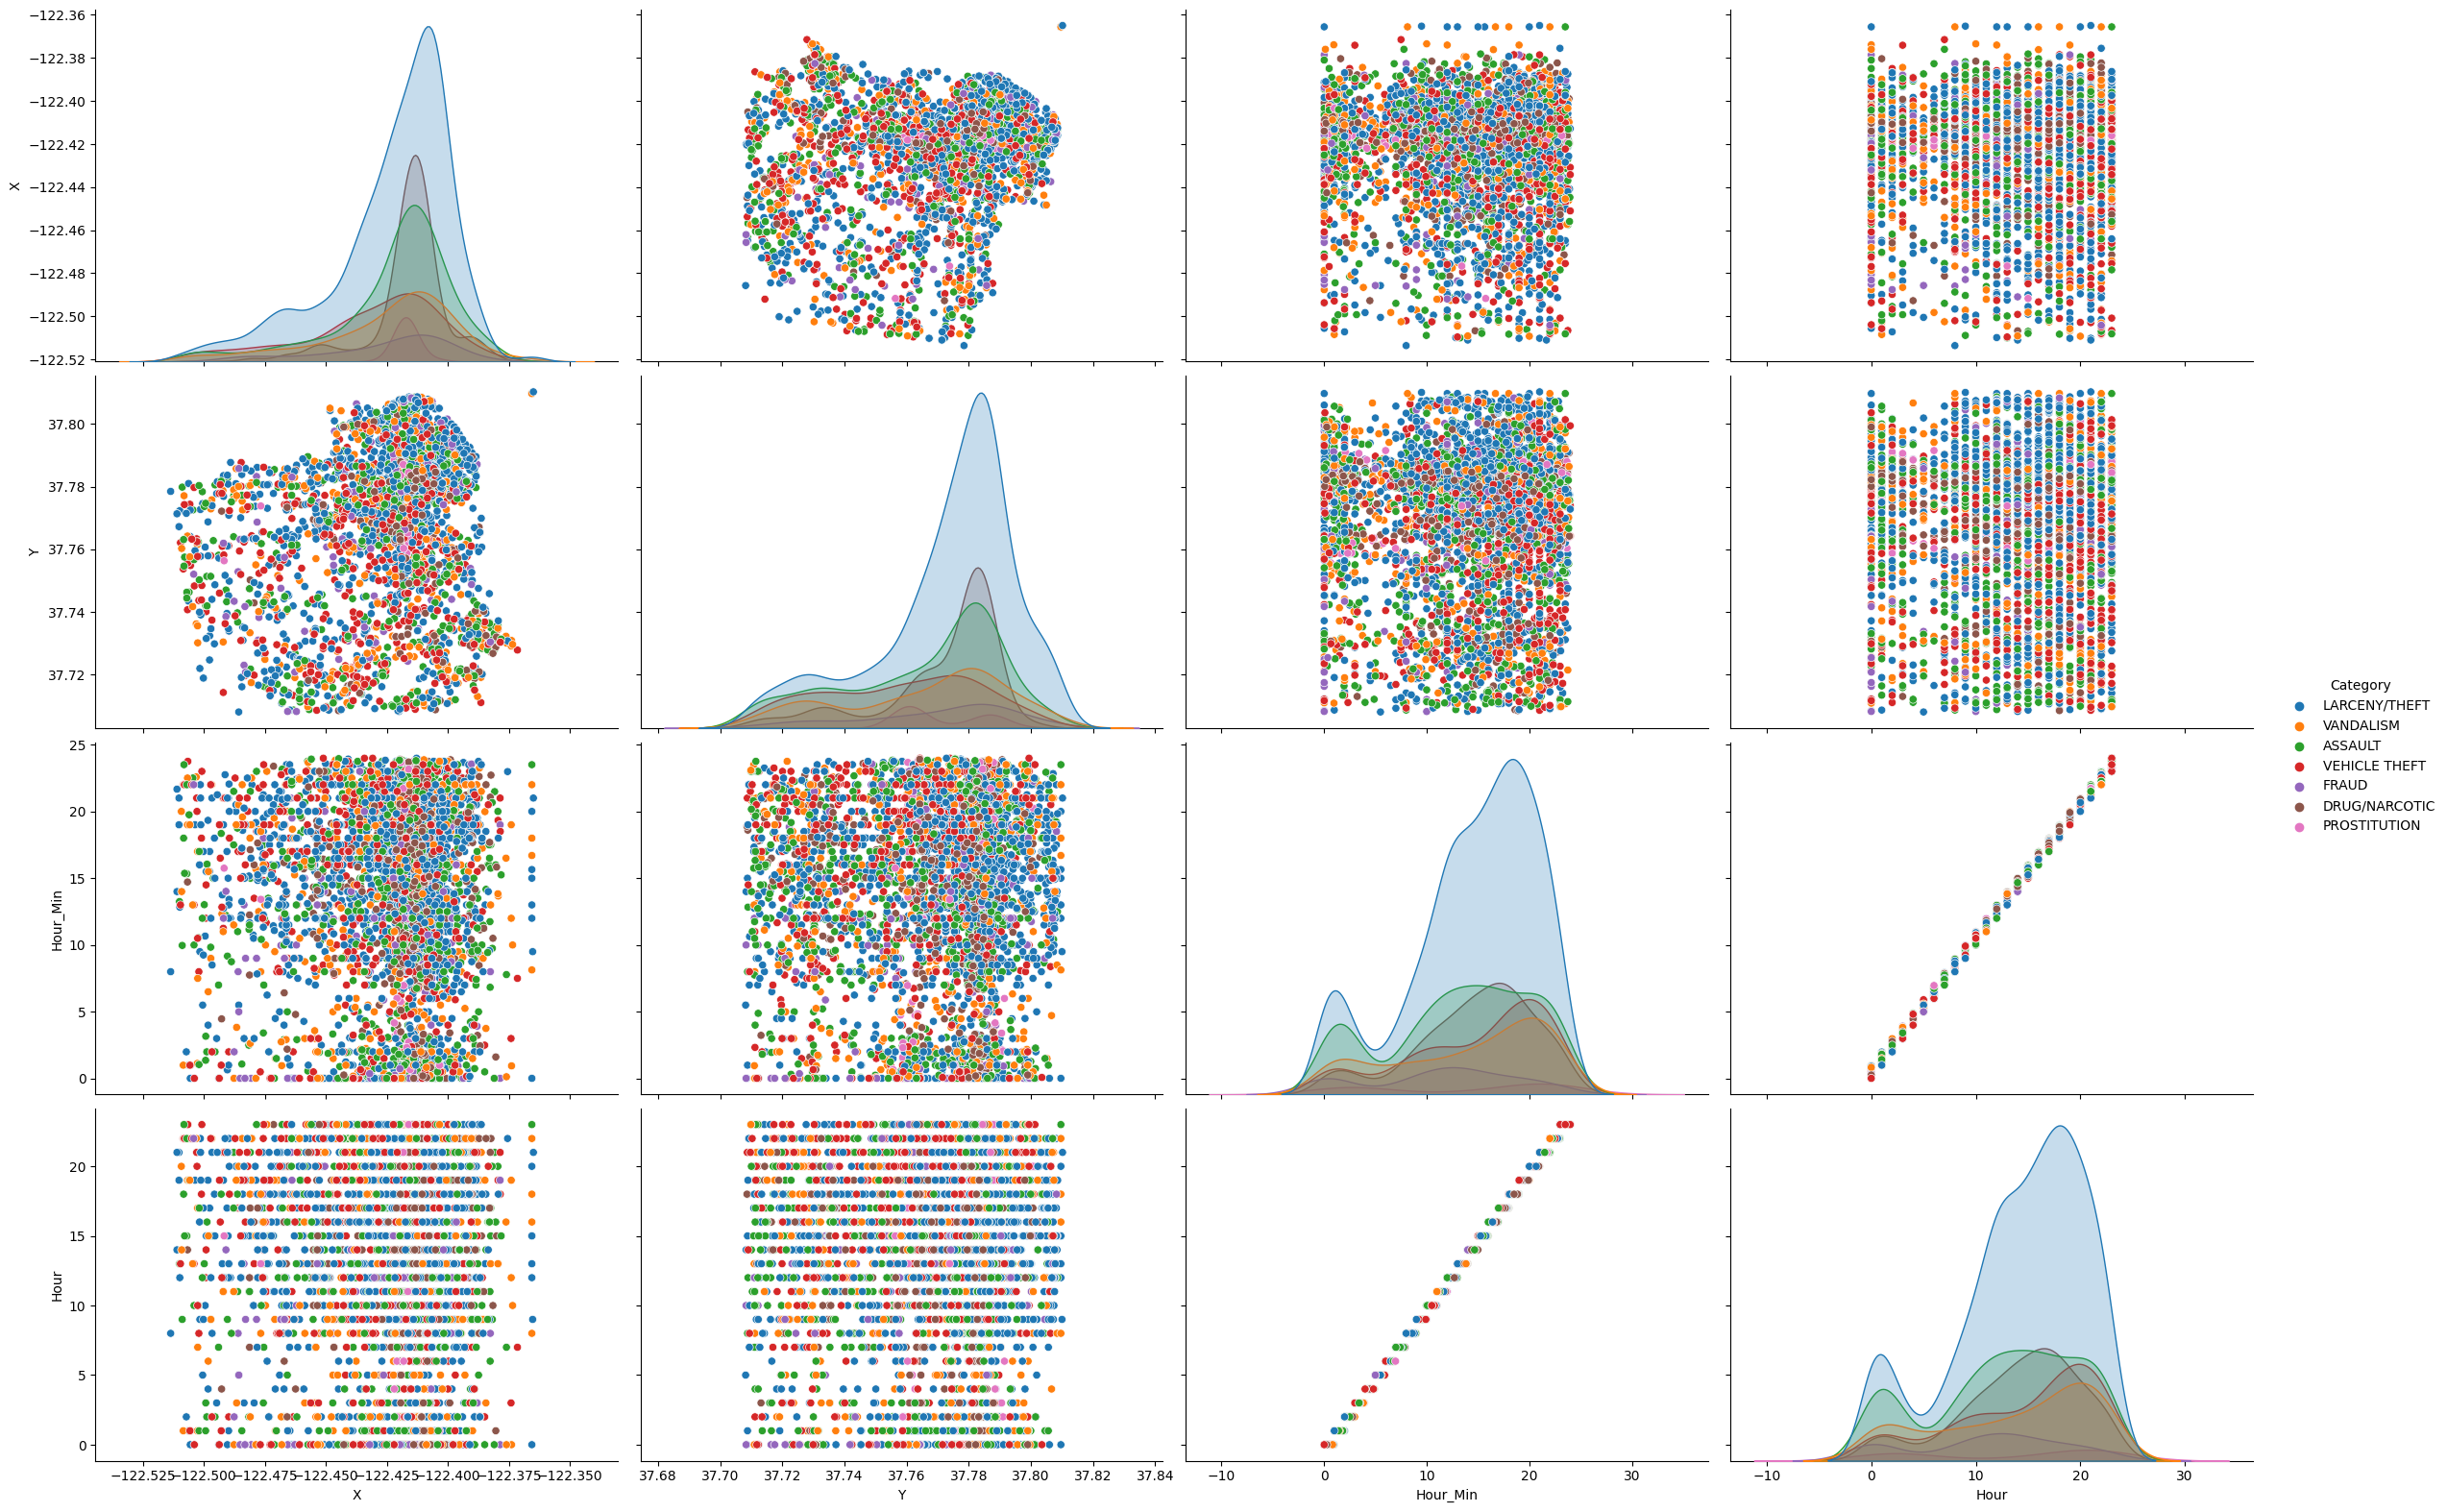

In [28]:
# Plot 1/100th of the data to reduce computation time and overview of other additional features
sns.pairplot(data = df_base_filtered[0::100], height=4, aspect=1.5, hue='Category')

In [29]:
# Extracting 10 sample values of crime addresses.. this helps us understand that a lot of crimes happened at intersections
for i in df_base['Address'][0:10]:
    print(i)

OAK ST / LAGUNA ST
OAK ST / LAGUNA ST
VANNESS AV / GREENWICH ST
1500 Block of LOMBARD ST
100 Block of BRODERICK ST
0 Block of TEDDY AV
AVALON AV / PERU AV
KIRKWOOD AV / DONAHUE ST
600 Block of 47TH AV
JEFFERSON ST / LEAVENWORTH ST


In [30]:
# In this section we create 3 features based on the information we learned in the above sections. Date & Time, Address and Latitude & Longitude. These features are comprised of different parts of our dataset to give a clear picture of when and where a crime occured
# Processing Function for Features
def cart2polar(x, y):
    dist = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return dist, phi

def preprocessFeatures(dfx):
    
    # Time Feature Engineering
    df = pd.get_dummies(dfx[['DayOfWeek' , 'PdDistrict']])
    df['Hour_Min'] = pd.to_datetime(dfx['Dates']).dt.hour + pd.to_datetime(dfx['Dates']).dt.minute / 60
    df['Hour'] = pd.to_datetime(dfx['Dates']).dt.hour
    # We add a feature that contains the expontential time
    df['Hour_Min_Exp'] = np.exp(df['Hour_Min'])
    
    df['Day'] = pd.to_datetime(dfx['Dates']).dt.day
    df['Month'] = pd.to_datetime(dfx['Dates']).dt.month
    df['Year'] = pd.to_datetime(dfx['Dates']).dt.year

    month_one_hot_encoded = pd.get_dummies(pd.to_datetime(dfx['Dates']).dt.month, prefix='Month')
    df = pd.concat([df, month_one_hot_encoded], axis=1, join="inner")
    
    # Convert Carthesian Coordinates to Polar Coordinates
    df[['X', 'Y']] = dfx[['X', 'Y']] # we maintain the original coordindates as additional features
    df['dist'], df['phi'] = cart2polar(dfx['X'], dfx['Y'])
  
    # Extracting Street Types
    df['Is_ST'] = dfx['Address'].str.contains(" ST", case=True)
    df['Is_AV'] = dfx['Address'].str.contains(" AV", case=True)
    df['Is_WY'] = dfx['Address'].str.contains(" WY", case=True)
    df['Is_TR'] = dfx['Address'].str.contains(" TR", case=True)
    df['Is_DR'] = dfx['Address'].str.contains(" DR", case=True)
    df['Is_Block'] = dfx['Address'].str.contains(" Block", case=True)
    df['Is_crossing'] = dfx['Address'].str.contains(" / ", case=True)
    
    return df

# Processing Function for Labels
def encodeLabels(dfx):
    df = pd.DataFrame (columns = [])
    factor = pd.factorize(dfx['Category'])
    return factor

# Remove Outliers by Longitude
df_cleaned = df_base[df_base['Y']<70]

# Encode Labels as Integer
factor = encodeLabels(df_cleaned)
y_df = factor[0]
labels = list(factor[1])

# print(y_df)


# for val, i in enumerate(labels):
#     print(val, i)

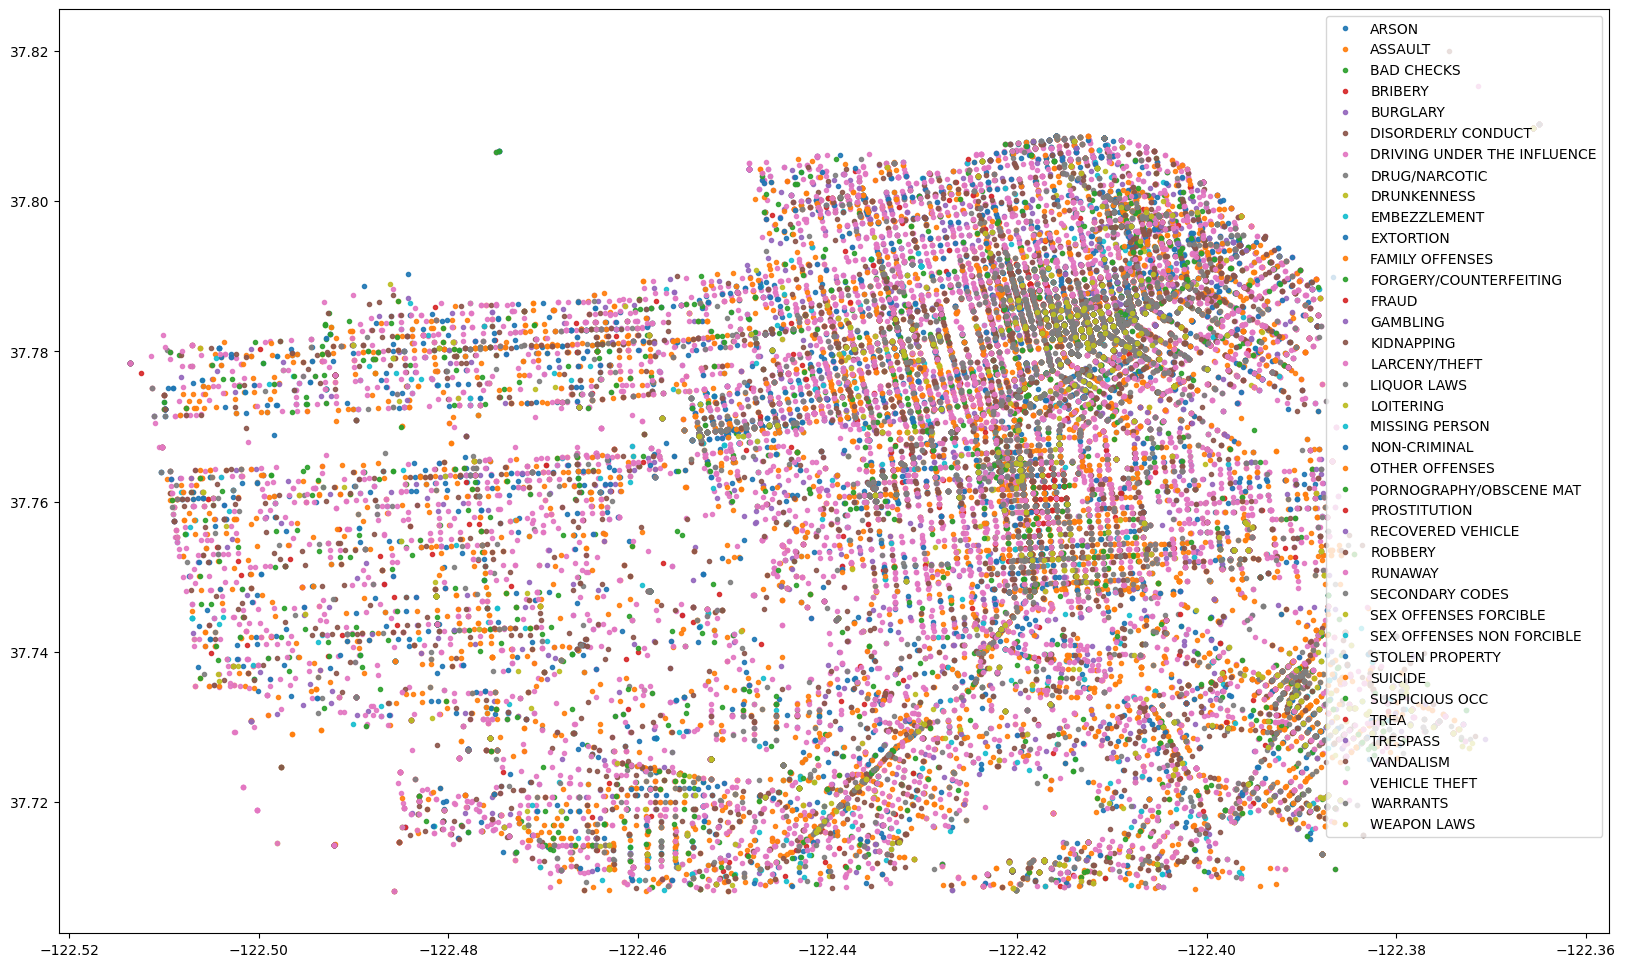

In [31]:
# Scatter plot of crimes across San Fransisco, which helps us see if certain crimes happen a lot in certain areas
# Plot Criminal Activities by Lat and Long
df_filtered = df_cleaned.sample(frac=0.05)  
#df_filtered = df_cleaned[df_cleaned['Category'].isin(['PROSTITUTION', 'VEHICLE THEFT', 'FRAUD'])].sample(frac=0.05) # to filter 

groups = df_filtered.groupby('Category')

fig, ax = plt.subplots(sharex=False, figsize=(20, 12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['X'], group['Y'], marker='.', linestyle='', label=name, alpha=0.9)
ax.legend()
plt.show()

In [32]:
# 4.2 Create a Crime Map of San Francisco using Plotly
# Limit the data to a fraction and selected categories
df_filtered = df_cleaned.sample(frac=0.01) 
fig = px.scatter_mapbox(df_filtered, lat="Y", lon="X", hover_name="Category", color='Category', hover_data=["Y", "X"], zoom=12, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [33]:
# Create train_df & test_df
x_df = preprocessFeatures(df_cleaned).copy()
# Split the data into x_train and y_train data sets
x_train, x_test, y_train, y_test = train_test_split(x_df, df_cleaned["Category"], train_size=0.7, random_state=0)
# x_train
# df_cleaned["Category"].value_counts()

In [34]:

addresses = df_base['Address'].unique()
binary_dict = {address: i for i, address in enumerate(addresses)}
filtered_address_df = df_base['Address_Binary'] = df_base['Address'].map(binary_dict)


columns_to_drop = ['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', "Hour_Min", "Address"]
filtered_columns = df_base.drop(columns_to_drop, axis=1)

new_data = pd.DataFrame({'Hour': [12], 'Address_Binary': [3]})

# df = pd.DataFrame(np.arange(12).reshape(3, 4),
#                   columns=['A', 'B', 'C', 'D'])
filtered_columns.head()
# y_df.describe()
print(len(y_df))

877982


In [19]:
x = filtered_columns  # Features
y = df_base["Hour"]# Features

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.25, random_state=0)

clf = DecisionTreeClassifier(max_depth=15, random_state=0)

# Fit the model to the training data
clf.fit(x_train, y_train)

# Predict on the test data
y_pred = clf.predict(x_test)
# new_pred = clf.predict(new_data)
# print(new_pred)
print(y_pred[0])
# Evaluate the performance of the model
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

17
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33620
           1       1.00      1.00      1.00     19593
           2       1.00      1.00      1.00     16677
           3       1.00      1.00      1.00     10476
           4       0.00      0.00      0.00      7416
           5       0.00      0.00      0.00      6473
           6       0.42      1.00      0.59      9896
           7       1.00      1.00      1.00     16652
           8       1.00      1.00      1.00     24754
           9       1.00      1.00      1.00     26633
          10       1.00      1.00      1.00     28453
          11       1.00      1.00      1.00     28728
          12       1.00      1.00      1.00     39008
          13       1.00      1.00      1.00     32347
          14       1.00      1.00      1.00     33336
          15       1.00      1.00      1.00     36043
          16       1.00      1.00      1.00     37596
          17       1.00 

In [20]:
# Train a single random forest classifier - parameters are a best guess
# We will use this algorithm as a baseline to test against our gradient boost
clf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators = 200)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

results_log = classification_report(y_test, y_pred, zero_division=0)
print(results_log)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33620
           1       0.98      0.13      0.23     19593
           2       0.88      0.04      0.08     16677
           3       0.00      0.00      0.00     10476
           4       0.00      0.00      0.00      7416
           5       1.00      0.01      0.01      6473
           6       0.87      0.02      0.03      9896
           7       0.95      0.00      0.01     16652
           8       0.30      0.02      0.03     24754
           9       0.20      0.45      0.27     26633
          10       0.40      0.83      0.54     28453
          11       0.96      1.00      0.98     28728
          12       0.49      1.00      0.65     39008
          13       1.00      1.00      1.00     32347
          14       1.00      1.00      1.00     33336
          15       1.00      1.00      1.00     36043
          16       1.00      1.00      1.00     37596
          17       1.00    

In [14]:
df_timeint = df_base

# df_base.head()
df_base['Dates'] = pd.to_datetime(df_base['Dates'])
df_timeint['timeint'] = (df_base['Dates']-df_base['Dates'].dt.normalize()).dt.total_seconds()/timedelta(days=1).total_seconds()

# print(df_base["timeint"])

In [15]:
# addresses = df_base['Address'].unique()
# binary_dict = {address: i for i, address in enumerate(addresses)}
# filtered_address_df = df_base['Address_Binary'] = df_base['Address'].map(binary_dict)


# columns_to_drop = ['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', "Hour_Min", "Address"]
# filtered_columns = df_base.drop(columns_to_drop, axis=1)

# new_data = pd.DataFrame({'Hour': [12], 'Address_Binary': [3]})

# # df = pd.DataFrame(np.arange(12).reshape(3, 4),
# #                   columns=['A', 'B', 'C', 'D'])
# filtered_columns.head()
# # y_df.describe()
# print(len(y_df))

In [16]:
# x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=0)
# x_train

df_timeint['X'].value_counts()

X
-122.403405    26354
-122.419658     4449
-122.406539     3891
-122.407634     3170
-122.419672     3006
               ...  
-122.437780        1
-122.424474        1
-122.481022        1
-122.465812        1
-122.394926        1
Name: count, Length: 34243, dtype: int64

Y          X          
37.775421  -122.403405    88
37.764221  -122.419658    24
37.756486  -122.406539    13
37.769247  -122.426956    12
37.765050  -122.419672    12
                          ..
37.757778  -122.481015     1
37.757727  -122.420490     1
37.757706  -122.407757     1
37.757699  -122.503656     1
37.771688  -122.433737     1
Name: count, Length: 2303, dtype: int64
Mean Absolute Error: 0.2269974006955399


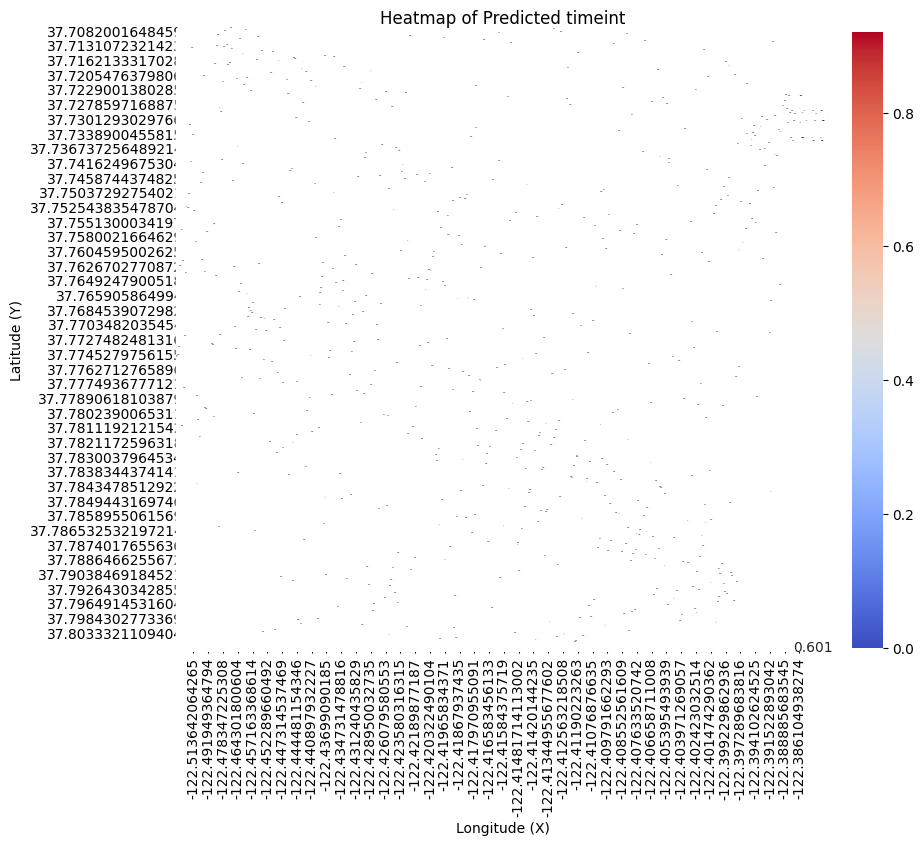

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import folium
import folium.plugins as plugins

# Sample data
# data = {
#     'Y': [37.774599, 37.774599, 37.800414, 37.800873, 37.771541],
#     'X': [-122.425892, -122.425892, -122.424363, -122.426995, -122.438738],
#     'timeint': [0.995139, 0.995139, 0.981250, 0.979167, 0.979167]
# }
# df_timeint = pd.DataFrame(data)

# Randomly select 1% of the samples from df_timeint
random_samples = df_timeint.sample(frac=0.005, random_state=42)

# Extract the features and target from random_samples
X = random_samples[['Y', 'X']]
y = random_samples['timeint']

xTrain = X.sample(frac=0.70)
yTrain = y.sample(frac=0.70)
yTest = y.sample(frac=0.20) 
xVal = X.sample(frac=0.20)

print(xTrain.value_counts())


# Create and train the model
clf = GradientBoostingRegressor(loss='squared_error', n_estimators=250, max_depth=3, learning_rate=0.1)
clf.fit(xTrain, yTrain)

# Generate predictions
y_pred = clf.predict(xVal)

# Calculate mean absolute error (optional)
mae = mean_absolute_error(yTest, y_pred)
print("Mean Absolute Error:", mae)

prepareHeatMapData = random_samples.sample(frac=0.20)
# Creating the heatmap
heatmap_data = prepareHeatMapData.copy()
heatmap_data['Predicted_timeint'] = y_pred

# Reshape the data for the heatmap (convert to pivot table)
heatmap_data = heatmap_data.pivot_table(index='Y', columns='X', values='Predicted_timeint', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".3f")
plt.title("Heatmap of Predicted timeint")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.show()

# Create a folium map
m = folium.Map(location=[random_samples['Y'].mean(), random_samples['X'].mean()], zoom_start=12)

# Add heatmap to the map
hm = plugins.HeatMap(
    list(zip(random_samples['Y'], random_samples['X'], y_pred)),
    min_opacity=0.5,
    radius=15,
    blur=10,
    max_zoom=1
)
m.add_child(hm)

# Display the map
m


791


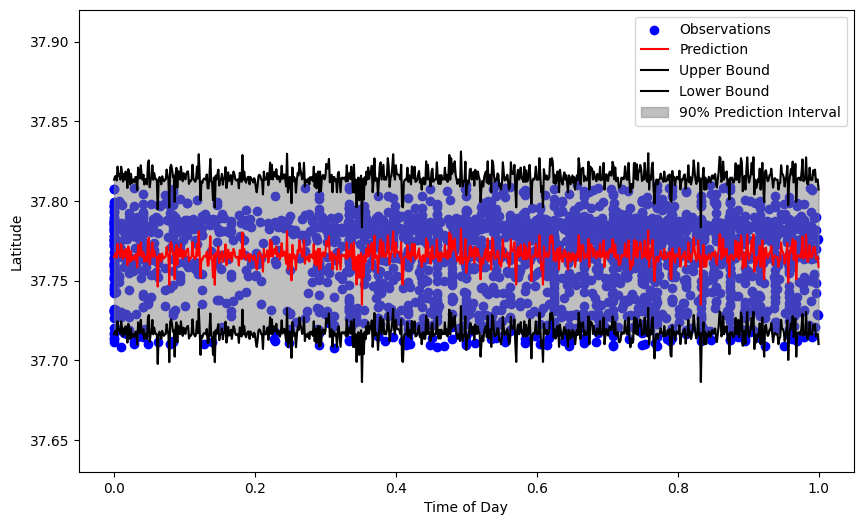

In [48]:
# Extract the features and target
random_samples = df_timeint.sample(frac=0.003, random_state=42)

# Extract the features and target from random_samples
X = random_samples['timeint'].values.reshape(-1, 1)
y = random_samples['Y'].values

# xTrain = X.sample(frac=0.70)
# yTrain = y.sample(frac=0.70)
# yTest = y.sample(frac=0.20) 
# xVal = X.sample(frac=0.20)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(yTest))

# Create and train the model
clf = GradientBoostingRegressor(loss='squared_error', n_estimators=250, max_depth=3, learning_rate=0.1)
clf.fit(xTrain, yTrain)

# Generate predictions
xx = np.linspace(0, 1, num=len(yTest)).reshape(-1, 1)
y_pred = clf.predict(xTest)

mse = np.mean((yTest - y_pred) ** 2)
std = np.sqrt(mse)
y_upper = y_pred + 1.95 * std  # 1.95 corresponds to a 95% confidence interval
y_lower = y_pred - 1.95 * std

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(random_samples['timeint'], random_samples['Y'], color='b', label='Observations')
plt.plot(xx, y_pred, 'r-', label='Prediction')
plt.plot(xx, y_upper, 'k-', label='Upper Bound')
plt.plot(xx, y_lower, 'k-', label='Lower Bound')
plt.fill_between(xx.flatten(), y_lower, y_upper, color='gray', alpha=0.5, label='90% Prediction Interval')
plt.xlabel('Time of Day')
plt.ylim(37.63, 37.92)
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.show()

-122.365565425353
791


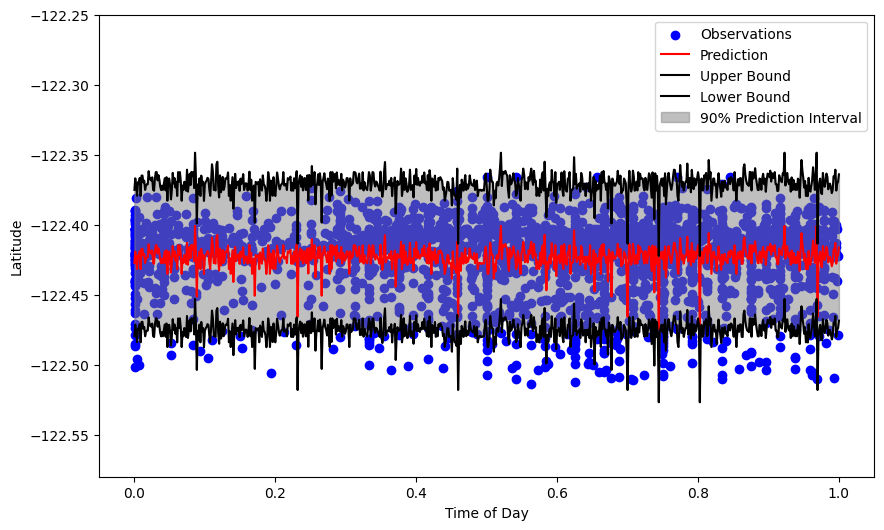

In [57]:
# Extract the features and target
random_samples = df_timeint.sample(frac=0.003, random_state=42)

# Extract the features and target from random_samples
X = random_samples['timeint'].values.reshape(-1, 1)
y = random_samples['X'].values

print(y.max())

# xTrain = X.sample(frac=0.70)
# yTrain = y.sample(frac=0.70)
# yTest = y.sample(frac=0.20) 
# xVal = X.sample(frac=0.20)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(yTest))

# Create and train the model
clf = GradientBoostingRegressor(loss='squared_error', n_estimators=250, max_depth=3, learning_rate=0.1)
clf.fit(xTrain, yTrain)

# Generate predictions
xx = np.linspace(0, 1, num=len(yTest)).reshape(-1, 1)
y_pred = clf.predict(xTest)

mse = np.mean((yTest - y_pred) ** 2)
std = np.sqrt(mse)
y_upper = y_pred + 1.95 * std  # 1.95 corresponds to a 95% confidence interval
y_lower = y_pred - 1.95 * std

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(random_samples['timeint'], random_samples['X'], color='b', label='Observations')
plt.plot(xx, y_pred, 'r-', label='Prediction')
plt.plot(xx, y_upper, 'k-', label='Upper Bound')
plt.plot(xx, y_lower, 'k-', label='Lower Bound')
plt.fill_between(xx.flatten(), y_lower, y_upper, color='gray', alpha=0.5, label='90% Prediction Interval')
plt.xlabel('Time of Day')
plt.ylim(-122.580, -122.250)
plt.ylabel('Longitude')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Configure the XGBoost model
param = {'booster': 'gbtree', 
         'tree_method': 'gpu_hist',
         'predictor': 'gpu_predictor',
         'max_depth': 140, 
         'eta': 0.3, 
         'objective': '{multi:softmax}', 
         'eval_metric': 'mlogloss', 
         'num_round': 30,
         'feature_selector ': 'cyclic'
        }

xgb_clf = XGBClassifier(param)
xgb_clf.fit(x_train, y_train.ravel())
score = xgb_clf.score(x_test, y_test.ravel())
print(score)

# Create predictions on the test dataset
y_pred = xgb_clf.predict(x_test)

# Print a classification report
results_log = classification_report(y_test, y_pred)
print(results_log)

c:\Users\Andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:617: FutureWarning:

Pass `objective` as keyword args.



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23], got ['ASSAULT' 'BURGLARY' 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC'
 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'FRAUD' 'KIDNAPPING'
 'LARCENY/THEFT' 'MISSING PERSON' 'NON-CRIMINAL' 'OTHER OFFENSES'
 'PROSTITUTION' 'ROBBERY' 'RUNAWAY' 'SECONDARY CODES'
 'SEX OFFENSES FORCIBLE' 'STOLEN PROPERTY' 'SUSPICIOUS OCC' 'TRESPASS'
 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']

In [ ]:
# Print a multi-Class Confusion Matrix
cnf_matrix = confusion_matrix(y_test.reshape(-1), y_pred)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
# Our confusion matrix shows us that our model frequently predicts crime category two abnd neglects the other types of crime. The reason is the uneven distribution of crime types in the training data.